In [1]:
from setting import *

%matplotlib inline

In [2]:
tickers = ['TQQQ','TMF']

In [3]:
data = getHistoryByYf(tickers, tickers)
print('data \n', data)
assets = data.resample('M').last().dropna()
print('assets \n', assets)

[*********************100%***********************]  2 of 2 completed
data 
                  TQQQ       TMF
Date                           
2010-02-11   0.431471  6.695424
2010-02-12   0.433238  6.771189
2010-02-16   0.450019  6.831800
2010-02-17   0.457656  6.613166
2010-02-18   0.466332  6.500600
...               ...       ...
2022-11-23  22.730000  8.600000
2022-11-25  22.260000  8.540000
2022-11-28  21.280001  8.610000
2022-11-29  20.770000  8.290000
2022-11-30  23.559999  8.450000

[3224 rows x 2 columns]
assets 
                  TQQQ        TMF
Date                            
2010-02-28   0.463890   7.117541
2010-03-31   0.577927   6.638205
2010-04-30   0.613152   7.299415
2010-05-31   0.473034   8.506558
2010-06-30   0.383727   9.931692
...               ...        ...
2022-07-31  33.360001  13.252264
2022-08-31  27.809999  11.329190
2022-09-30  19.320000   8.570000
2022-10-31  20.950001   6.960000
2022-11-30  23.559999   8.450000

[154 rows x 2 columns]


In [4]:
# 오리지널 듀얼모멘텀 데이터(비교자산, 안전자산)
dualtickers = ['BND','BIL']

dualdata = getHistoryByYf(dualtickers, dualtickers)
dualdata = pd.merge(data, dualdata, how='outer', on='Date')
dualdata = dualdata.sort_values(by=['Date'],ascending=True)
dualassets = dualdata.resample('M').last().dropna()

[*********************100%***********************]  2 of 2 completed


In [10]:
selected = getDualMomentumAsset(dualassets, 12, 1, tickers, dualtickers)
dualMomentum = Selected_Asset_BT(dualassets, selected, name="Original DM")

momentum head(20) 
                 TQQQ       TMF       BND       BIL
Date                                              
2010-02-28       NaN       NaN       NaN       NaN
2010-03-31       NaN       NaN       NaN       NaN
2010-04-30       NaN       NaN       NaN       NaN
2010-05-31       NaN       NaN       NaN       NaN
2010-06-30       NaN       NaN       NaN       NaN
2010-07-31       NaN       NaN       NaN       NaN
2010-08-31       NaN       NaN       NaN       NaN
2010-09-30       NaN       NaN       NaN       NaN
2010-10-31       NaN       NaN       NaN       NaN
2010-11-30       NaN       NaN       NaN       NaN
2010-12-31       NaN       NaN       NaN       NaN
2011-01-31       NaN       NaN       NaN       NaN
2011-02-28  0.952292  0.042479  0.049093 -0.000218
2011-03-31  0.530206  0.111585  0.049876 -0.000218
2011-04-30  0.566004  0.077289  0.053965  0.000218
2011-05-31  0.942449  0.020171  0.054518  0.000000
2011-06-30  1.226644 -0.190823  0.035530 -0.000218
2011-07-31 

In [11]:
selected = getDualMomentumAsset(dualassets, 12, 2, tickers, dualtickers)
dualMomentum_rank2 = Selected_Asset_BT(dualassets, selected, name="DM_rank2")

momentum head(20) 
                 TQQQ       TMF       BND       BIL
Date                                              
2010-02-28       NaN       NaN       NaN       NaN
2010-03-31       NaN       NaN       NaN       NaN
2010-04-30       NaN       NaN       NaN       NaN
2010-05-31       NaN       NaN       NaN       NaN
2010-06-30       NaN       NaN       NaN       NaN
2010-07-31       NaN       NaN       NaN       NaN
2010-08-31       NaN       NaN       NaN       NaN
2010-09-30       NaN       NaN       NaN       NaN
2010-10-31       NaN       NaN       NaN       NaN
2010-11-30       NaN       NaN       NaN       NaN
2010-12-31       NaN       NaN       NaN       NaN
2011-01-31       NaN       NaN       NaN       NaN
2011-02-28  0.952292  0.042479  0.049093 -0.000218
2011-03-31  0.530206  0.111585  0.049876 -0.000218
2011-04-30  0.566004  0.077289  0.053965  0.000218
2011-05-31  0.942449  0.020171  0.054518  0.000000
2011-06-30  1.226644 -0.190823  0.035530 -0.000218
2011-07-31 

In [12]:
dualMomentum_r2_m = {}
for i in range(0, 12):
    selected = getDualMomentumAsset(dualassets, i+1, 2, tickers, dualtickers)
    dualMomentum_r2_m[i] = Selected_Asset_BT(dualassets, selected, 'DM_r2_m_{}'.format(str(i+1)))

momentum head(20) 
                 TQQQ       TMF       BND       BIL
Date                                              
2010-02-28       NaN       NaN       NaN       NaN
2010-03-31  0.245829 -0.067346 -0.002217  0.000000
2010-04-30  0.060950  0.099607  0.010702 -0.000436
2010-05-31 -0.228521  0.165375  0.011274  0.000437
2010-06-30 -0.188797  0.167534  0.014511  0.000218
2010-07-31  0.217979 -0.038979  0.008614 -0.000436
2010-08-31 -0.151180  0.259395  0.015584  0.000000
2010-09-30  0.431379 -0.090175 -0.000048  0.000000
2010-10-31  0.195517 -0.135699  0.003191  0.000218
2010-11-30 -0.014311 -0.060297 -0.006815  0.000000
2010-12-31  0.148137 -0.117522 -0.010206 -0.000218
2011-01-31  0.080066 -0.094049  0.000873  0.000000
2011-02-28  0.091410  0.044857  0.002933  0.000000
2011-03-31 -0.023520 -0.005520 -0.001473  0.000000
2011-04-30  0.085771  0.065680  0.014639  0.000000
2011-05-31 -0.043069  0.103588  0.011804  0.000218
2011-06-30 -0.070112 -0.073938 -0.003757  0.000000
2011-07-31 

Stat                 Equally Weighted
-------------------  ------------------
Start                2010-02-27
End                  2022-11-30
Risk-free rate       0.00%

Total Return         1502.84%
Daily Sharpe         3.92
Daily Sortino        7.00
CAGR                 24.30%
Max Drawdown         -74.42%
Calmar Ratio         0.33

MTD                  16.93%
3m                   -32.08%
6m                   -36.34%
YTD                  -69.30%
1Y                   -70.09%
3Y (ann.)            -9.06%
5Y (ann.)            5.86%
10Y (ann.)           18.34%
Since Incep. (ann.)  24.30%

Daily Sharpe         3.92
Daily Sortino        7.00
Daily Mean (ann.)    562.83%
Daily Vol (ann.)     143.43%
Daily Skew           -0.53
Daily Kurt           1.22
Best Day             24.57%
Worst Day            -31.92%

Monthly Sharpe       0.86
Monthly Sortino      1.53
Monthly Mean (ann.)  26.98%
Monthly Vol (ann.)   31.40%
Monthly Skew         -0.53
Monthly Kurt         1.20
Best Month           24.57

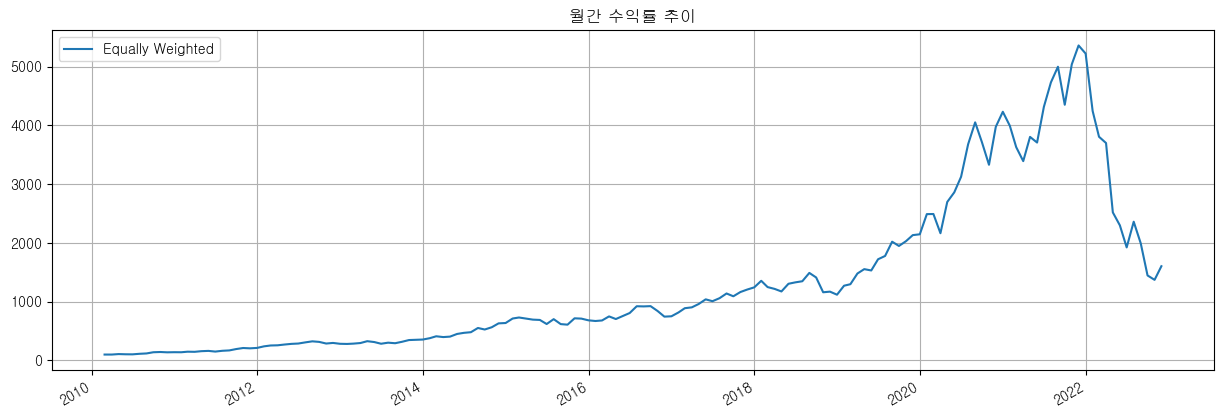

In [13]:
equalWeight = Equal_Weight_BT(assets, name='Equally Weighted')
report = bt.run(equalWeight)
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())

Stat                 Original DM    DM_rank2    DM_r2_m_1    DM_r2_m_2    DM_r2_m_3    DM_r2_m_4    DM_r2_m_5    DM_r2_m_6    DM_r2_m_7    DM_r2_m_8    DM_r2_m_9    DM_r2_m_10    DM_r2_m_11    DM_r2_m_12
-------------------  -------------  ----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ------------  ------------  ------------
Start                2010-02-27     2010-02-27  2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27   2010-02-27    2010-02-27    2010-02-27
End                  2022-11-30     2022-11-30  2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30   2022-11-30    2022-11-30    2022-11-30
Risk-free rate       0.00%          0.00%       0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%        0.00%         0.0

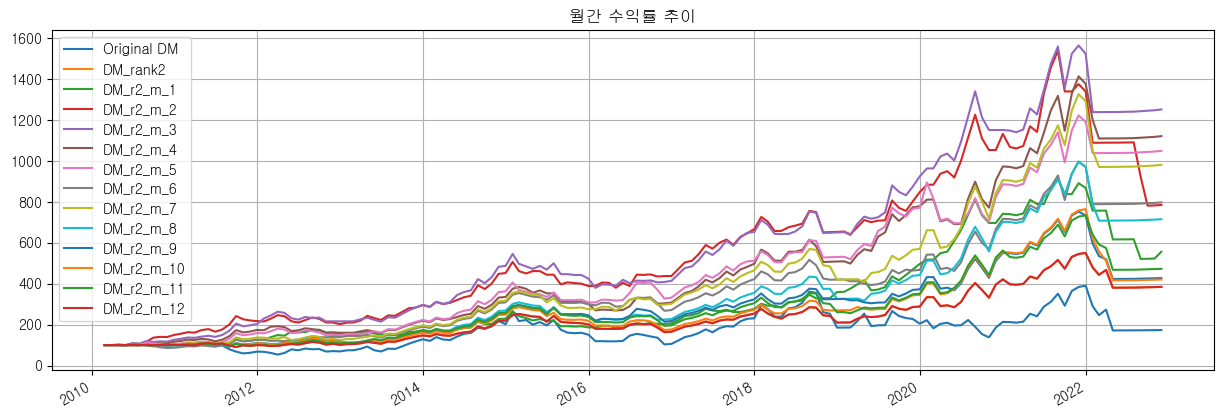

In [14]:
report = bt.run(dualMomentum, dualMomentum_rank2, *dualMomentum_r2_m.values())
report.plot()
plt.title('월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())